# __Image Processing__

In [1]:
# Import Libraries
import os
import cv2 as cv
import numpy as np
from termcolor import colored
import matplotlib.pyplot as plt

## __1. Basic Tools and Libraries__

### __1.1. Image Loading and Visualization__

[SUCCESS] The provided path exists and is accessible.


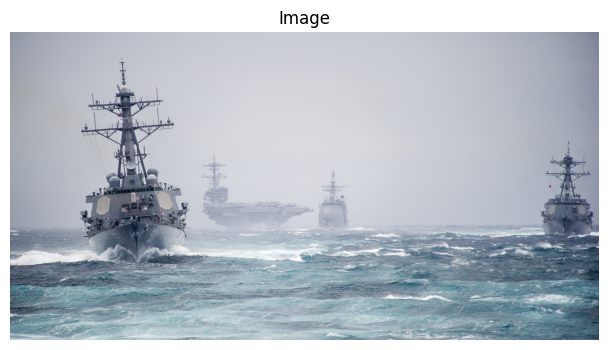

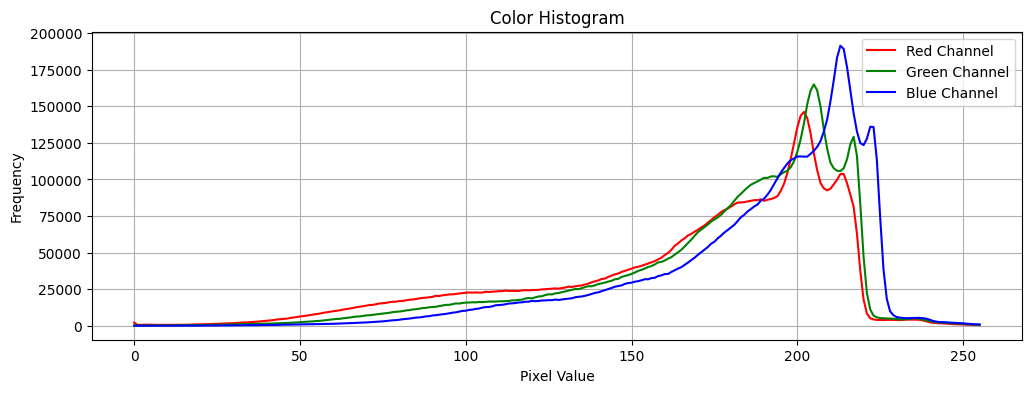

In [2]:
# Figures Folder
figs_folder = "figures"
# Results Folder
results_folder = "results"
# Image Filename
img_filename = "img1.jpg"
# Define the Relative Path to the Image
relative_path = f"../{figs_folder}/{img_filename}"
# Convert to Absolute Path
absolute_path = os.path.abspath(relative_path)

if (os.path.exists(absolute_path)):
    print(colored("[SUCCESS] The provided path exists and is accessible.", "green"))
    # Load Image (OpenCV loads in BGR format)
    image = cv.imread(relative_path)                     
    # Convert BGR to RGB for correct color display
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

    # Plot
    # Show The Image
    plt.figure(figsize=(12, 4))
    plt.imshow(image)
    plt.title("Image")
    plt.axis("off")
    # Plot Color Histograms
    plt.figure(figsize=(12, 4))
    for i, color in enumerate(["Red", "Green", "Blue"]):
        hist = np.histogram(image[:, :, i], bins=256, range=(0, 256))[0]
        plt.plot(hist, color=color, label=f"{color} Channel")
    plt.title("Color Histogram")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid()

    plt.show()    
else:
    print(colored("[ERROR] Path not found.", "red"))

### __1.2. Fundamental Image Processing__

**🔍 Resizing**

[INFO] Image Dimensions
Original Image : 2033 x 3887
Resized Image  : 1016 x 1943


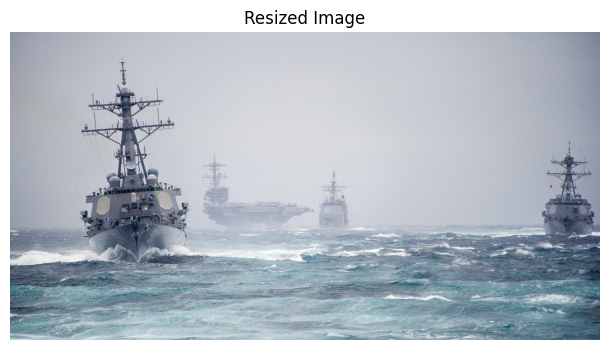

[SUCCESS] Image saved successfully: results/resized_img1.jpg


In [3]:
img_height = image.shape[0]
img_width  = image.shape[1]

resized_image = cv.resize(image, (int(img_width/2), int(img_height/2)), interpolation=cv.INTER_LINEAR)

# Print Image Dimensions
print(colored("[INFO] Image Dimensions", "yellow"))
# Original Image
print(colored(f"Original Image : {img_height} x {img_width}", "yellow"))
# Resized Image
print(colored(f"Resized Image  : {resized_image.shape[0]} x {resized_image.shape[1]}", "yellow"))

# Plot
plt.figure(figsize=(12, 4))
plt.imshow(resized_image)
plt.title("Resized Image")
plt.axis("off")
plt.show()

# Save Resized Image
# Convert to BGR (OpenCV Saves in BGR Format)
cv.imwrite(f"../{results_folder}/resized_{img_filename}", cv.cvtColor(resized_image, cv.COLOR_RGB2BGR))
print(colored(f"[SUCCESS] Image saved successfully: {results_folder}/resized_{img_filename}", "green"))

**✂️ Cropping**

[INFO] Image Dimensions
Cropped Image : 840 x 1600


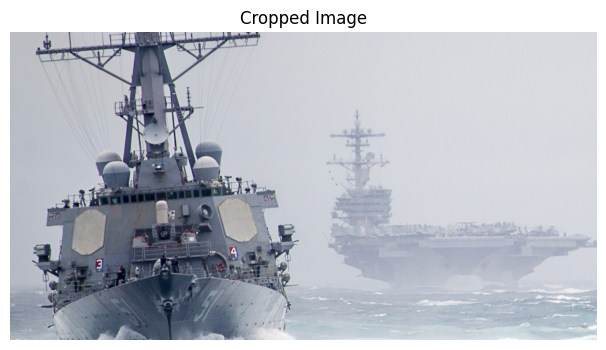

[SUCCESS] Image saved successfully: results/cropped_img1.jpg


In [4]:
cropped_image = image[600: 1440, 400:2000]

# Print Image Dimensions
print(colored("[INFO] Image Dimensions", "yellow"))
# Cropped Image
print(colored(f"Cropped Image : {cropped_image.shape[0]} x {cropped_image.shape[1]}", "yellow"))

# Plot
plt.figure(figsize=(12, 4))
plt.imshow(cropped_image)
plt.title("Cropped Image")
plt.axis("off")
plt.show()

# Save Cropped Image
# Convert to BGR (OpenCV Saves in BGR Format)
cv.imwrite(f"../{results_folder}/cropped_{img_filename}", cv.cvtColor(cropped_image, cv.COLOR_RGB2BGR))
print(colored(f"[SUCCESS] Image saved successfully: {results_folder}/cropped_{img_filename}", "green"))

**🔄 Inversion**

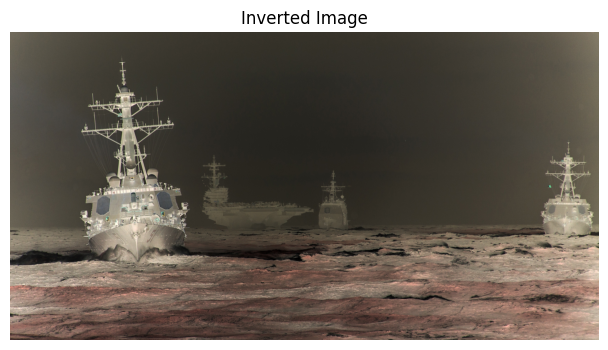

[SUCCESS] Image saved successfully: results/inverted_img1.jpg


In [5]:
inverted_image = 255 - image

# Plot
plt.figure(figsize=(12, 4))
plt.imshow(inverted_image)
plt.title("Inverted Image")
plt.axis("off")
plt.show()

# Save Inverted Image
# Convert to BGR (OpenCV Saves in BGR Format)
cv.imwrite(f"../{results_folder}/inverted_{img_filename}", cv.cvtColor(inverted_image, cv.COLOR_RGB2BGR))
print(colored(f"[SUCCESS] Image saved successfully: {results_folder}/inverted_{img_filename}", "green"))

**🔁 Rotation**

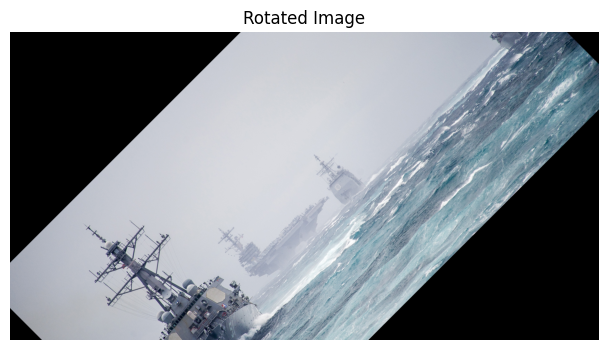

[SUCCESS] Image saved successfully: results/rotated_img1.jpg


In [6]:
# Get Image Dimensions
rows, cols = image.shape[:2]

# Image Center
rotation_center = (cols / 2, rows / 2)
# Set rotation parameters
angle = 45     # Rotation angle in degrees
scale = 1      # Scale factor (1 means no scaling)

# Calculate the rotation matrix for affine transformation
rotation_matrix = cv.getRotationMatrix2D(rotation_center, angle=angle, scale=scale)

# Apply the rotation to the image using the rotation matrix
rotated_image = cv.warpAffine(image, rotation_matrix, (cols, rows))

# Plot
plt.figure(figsize=(12, 4))
plt.imshow(rotated_image)
plt.title("Rotated Image")
plt.axis("off")
plt.show()

# Save Rotated Image
# Convert to BGR (OpenCV Saves in BGR Format)
cv.imwrite(f"../{results_folder}/rotated_{img_filename}", cv.cvtColor(rotated_image, cv.COLOR_RGB2BGR))
print(colored(f"[SUCCESS] Image saved successfully: {results_folder}/rotated_{img_filename}", "green"))

**🎚️ Grayscale Conversion**

[INFO] Image Dimensions
Original Image Dimensions  : 3
Grayscale Image Dimensions : 2


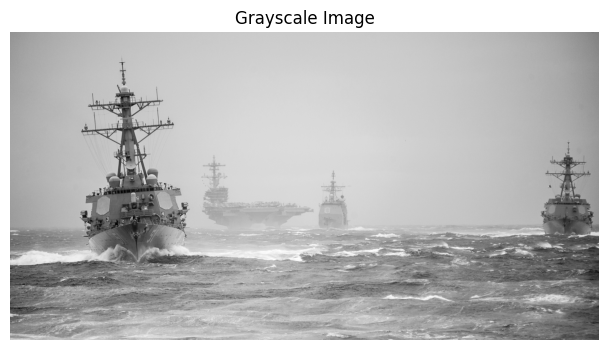

[SUCCESS] Image saved successfully: results/grayscale_img1.jpg


In [7]:
gray_image = cv.cvtColor(image, cv.COLOR_RGB2GRAY)

img_dimension  = image.ndim
gray_dimension = gray_image.ndim

# Print Image Dimensions
print(colored("[INFO] Image Dimensions", "yellow"))
# Print Original Image Dimension
print(colored(f"Original Image Dimensions  : {img_dimension}", "yellow"))
# Print Grayscale Image Dimensions
print(colored(f"Grayscale Image Dimensions : {gray_dimension}", "yellow"))

# Plot
plt.figure(figsize=(12, 4))
plt.imshow(gray_image, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

# Save Grayscale Image
# Convert to BGR (OpenCV Saves in BGR Format)
cv.imwrite(f"../{results_folder}/grayscale_{img_filename}", cv.cvtColor(gray_image, cv.COLOR_RGB2BGR))
print(colored(f"[SUCCESS] Image saved successfully: {results_folder}/grayscale_{img_filename}", "green"))

**🧠 Bitwise Operations**
- **AND Operation (Intersection) 🤝**  
  Used to apply a mask 🎭 and isolate specific regions of an image — like in segmentation or background removal.

- **OR Operation (Union) ➕**  
  Used to combine two images or add visual elements to the original — for example, overlaying a logo or watermark.

- **XOR Operation (Difference) 🔀**  
  Highlights the differences between two images or creates visual effects. Pixels that are `255` in one image and `0` in the other become `255` in the output; otherwise, the result is `0`.

- **NOT Operation (Complement) 🔄**  
  Inverts the image — flips pixel values, turning bright areas dark and vice versa.

**AND**

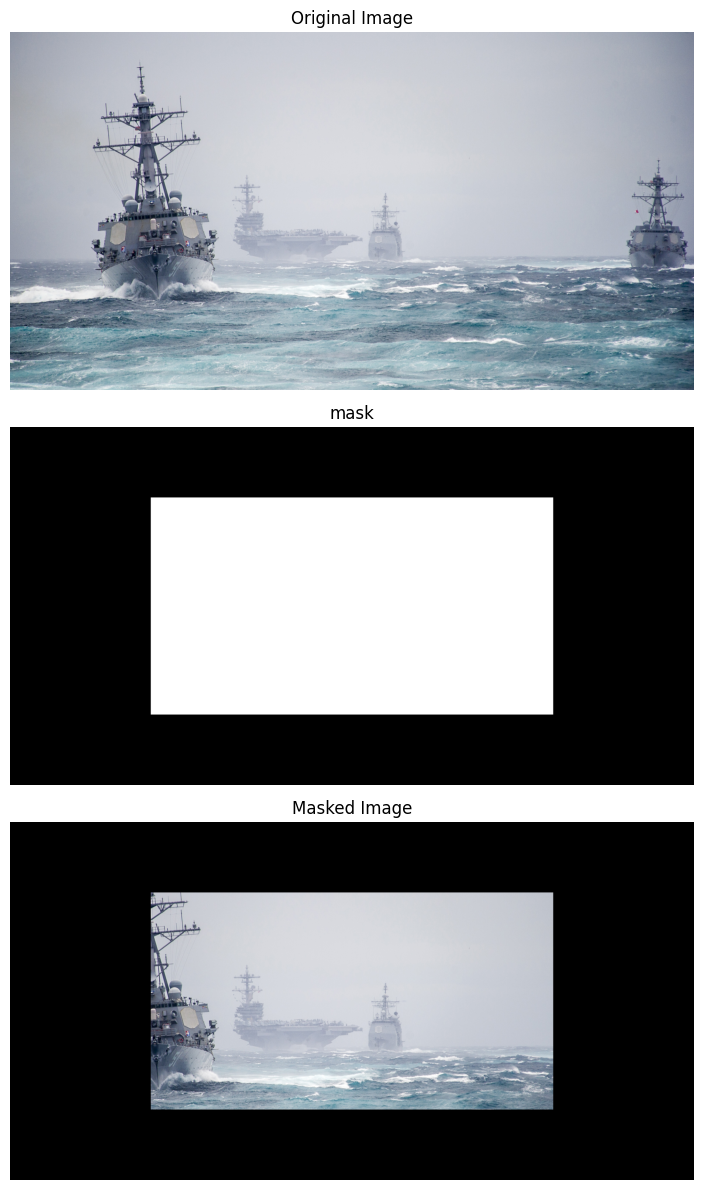

[SUCCESS] Image saved successfully: results/masked_img1.jpg


In [8]:
# Create a Black Mask (All Pixels = 0)
mask = np.zeros_like(image, dtype=np.uint8)
# Set a white rectangle area (pixels = 255) to keep that region
mask[400:1633, 800:3087] = 255
# Keep Only the White (255) Region of the Image Using Bitwise AND
masked_image = cv.bitwise_and(image, mask)

# Plot
plt.figure(figsize=(12, 12))
# Plot the Original Image
plt.subplot(3, 1, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
# Plot the Mask
plt.subplot(3, 1, 2)
plt.imshow(mask)
plt.title("mask")
plt.axis("off")
# Plot the Masked Image
plt.subplot(3, 1, 3)
plt.imshow(masked_image)
plt.title("Masked Image")
plt.axis("off")

plt.tight_layout()
plt.show()

# Save Masked Image
# Convert to BGR (OpenCV Saves in BGR Format)
cv.imwrite(f"../{results_folder}/masked_{img_filename}", cv.cvtColor(masked_image, cv.COLOR_RGB2BGR))
print(colored(f"[SUCCESS] Image saved successfully: {results_folder}/masked_{img_filename}", "green"))

**OR**

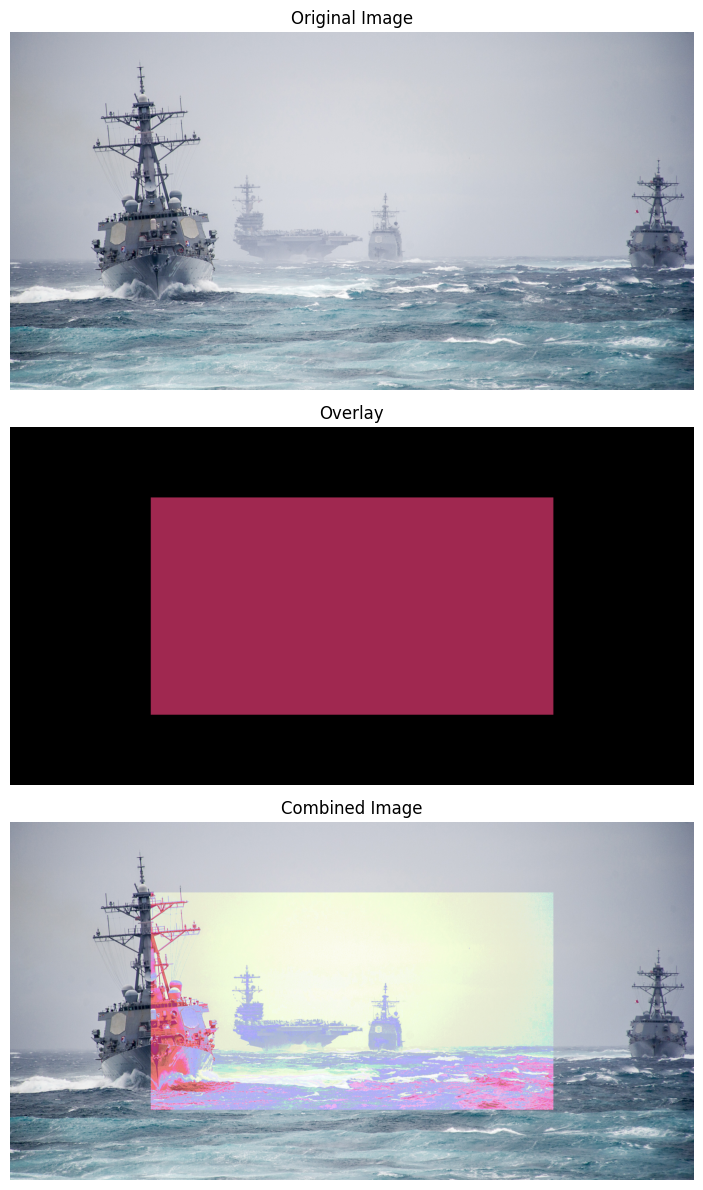

[SUCCESS] Image saved successfully: results/combined_img1.jpg


In [9]:
# Create a Black Image With the Same Size as the Original
overlay_mask = np.zeros_like(image, dtype=np.uint8)
# Define the Top-Left and Bottom-Right Corners of the Rectangle
top_left_coordinate     = (800, 400)      # (x, y) = (400, 800)
bottom_right_coordinate = (3087, 1633)    # (x, y) = (1633, 3087)

# Set a Custom Overlay Color in BGR Format
roi_color = (160, 40, 80)

# Draw a Filled Rectangle on the Black Overlay Image
cv.rectangle(overlay_mask, top_left_coordinate, bottom_right_coordinate, roi_color, -1)

combined_image = cv.bitwise_or(image, overlay_mask)

# Plot
plt.figure(figsize=(12, 12))
# Plot the Original Image
plt.subplot(3, 1, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off") 
# Plot the Overlay Maask
plt.subplot(3, 1, 2)
plt.imshow(overlay_mask)
plt.title("Overlay")
plt.axis("off")
# Plot the Combined Image
plt.subplot(3, 1, 3)
plt.imshow(combined_image)
plt.title("Combined Image")
plt.axis("off")

plt.tight_layout()
plt.show()

# Save Combined Image
# Convert to BGR (OpenCV Saves in BGR Format)
cv.imwrite(f"../{results_folder}/combined_{img_filename}", cv.cvtColor(combined_image, cv.COLOR_RGB2BGR))
print(colored(f"[SUCCESS] Image saved successfully: {results_folder}/combined_{img_filename}", "green"))